In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import matplotlib.pyplot as plt

In [66]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
sms = pd.read_csv("/content/spam.csv", encoding='latin-1')
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


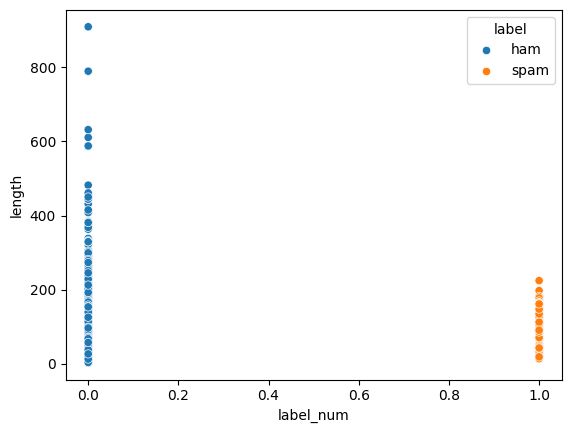

In [68]:
sms["label_num"] = sms['label'].map({'ham':0, 'spam':1})
sms["length"] = sms["message"].apply(len)
ax = sns.scatterplot(x="label_num", y="length", hue="label", data=sms)


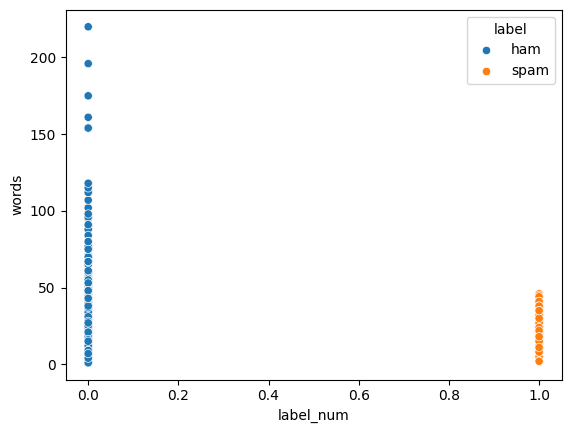

In [69]:
sms["words"]=sms.apply(lambda row: nltk.word_tokenize(row["message"]), axis=1).apply(len)
bx = sns.scatterplot(x="label_num", y="words", hue="label", data=sms)


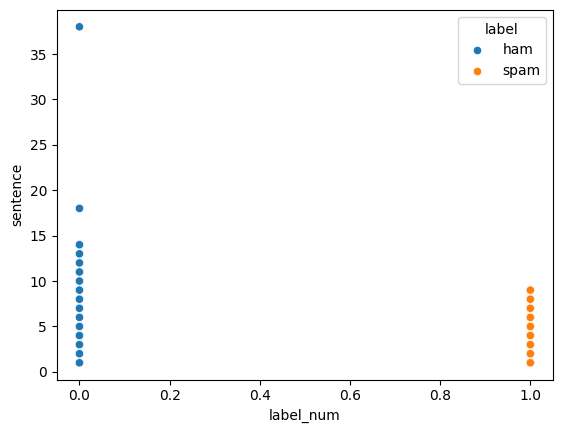

In [70]:
sms["sentence"]=sms.apply(lambda row: nltk.sent_tokenize(row["message"]), axis=1).apply(len)
cx = sns.scatterplot(x="label_num", y="sentence", hue="label", data=sms)

In [71]:
def Clean(Text):
    text = re.sub('[^a-zA-Z]', ' ', Text)
    text = text.lower()
    text = text.split()
    text = ' '.join(text)
    return text
sms["Clean_Text"] = sms["message"].apply(Clean)
print( *sms["Clean_Text"][:10], sep = "\n")

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though
freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv
even my brother is not like to speak with me they treat me like aids patent
as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune
winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only
had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free call the mobile update co free on


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X = sms.Clean_Text
y = sms.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

vect = CountVectorizer()
vect.fit(X_train)

X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)
print(type(X_train_dtm), X_train_dtm.shape)
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4179, 6597)
<class 'scipy.sparse._csr.csr_matrix'> (1393, 6597)


In [73]:
from collections import Counter
words = sms[sms.label=='ham'].Clean_Text.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

words = sms[sms.label=='spam'].Clean_Text.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

print('Ham',ham_words.most_common(10))
print('Spam',spam_words.most_common(10))


Ham [('i', 2948), ('you', 1944), ('to', 1554), ('the', 1126), ('a', 1060), ('u', 1026), ('and', 857), ('in', 820), ('me', 772), ('my', 750)]
Spam [('to', 688), ('a', 391), ('call', 370), ('you', 299), ('your', 264), ('free', 228), ('the', 206), ('for', 204), ('now', 203), ('or', 192)]


In [74]:
sms["Tokenize_Text"]=sms.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)
print( *sms["Tokenize_Text"][:10], sep = "\n")

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']
['freemsg', 'hey', 'there', 'darling', 'it', 's', 'been', 'week', 's', 'now', 'and', 'no', 'word', 'back', 'i', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'it', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'to', 'send', 'to', 'rcv']
['even', 'my', 'brother', 'is', 'not', 'like', 'to', 'speak', 'with', 'me', 'they', 'treat', 'me', 'like', 'aids', 'patent']
['as', 'per', 'your', 'request',

In [75]:
nltk.download('stopwords')
from nltk.corpus import stopwords

def remove_sw(message):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in message if word not in stop_words]
    return filtered_text

sms["Nostopword_Text"] = sms["Tokenize_Text"].apply(remove_sw)
print( *sms["Nostopword_Text"][:10], sep = "\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']
['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent']
['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune']
['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hours']
['mobile', 'months', 'u', 'r', '

In [76]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lz = WordNetLemmatizer()
def lemmatize_word(message):
    lemmas = [lz.lemmatize(word, pos ='v') for word in message]
    return lemmas
sms["Lemmatized_Text"] = sms["Nostopword_Text"].apply(lemmatize_word)
print( *sms["Lemmatized_Text"][:10], sep = "\n")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']
['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv']
['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent']
['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', 'copy', 'friends', 'callertune']
['winner', 'value', 'network', 'customer', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hours']
['mobile', 'months', 'u', 'r', 'entitle',

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(X_train_dtm)
x_train_tfidf = tfidf_transformer.transform(X_train_dtm)

x_train_tfidf

<4179x6597 sparse matrix of type '<class 'numpy.float64'>'
	with 53704 stored elements in Compressed Sparse Row format>

CPU times: user 17.8 ms, sys: 0 ns, total: 17.8 ms
Wall time: 18.7 ms
LogisticRegression Mean Accuracy : 0.914572864321608


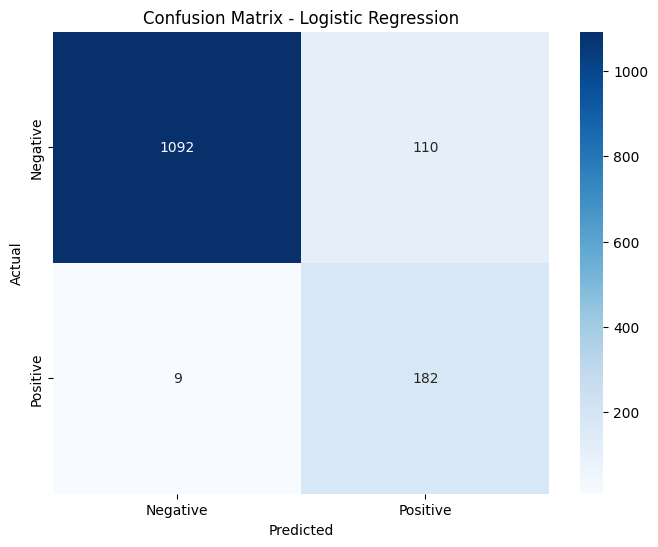

In [83]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(solver='liblinear')

%time logreg.fit(x_train_tfidf, y_train)
y_pred_class = logreg.predict(X_test_dtm)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
print('LogisticRegression Mean Accuracy :',metrics.accuracy_score(y_test, y_pred_class))
conf_matrix = metrics.confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()



SVC Mean Accuracy : 0.977264 


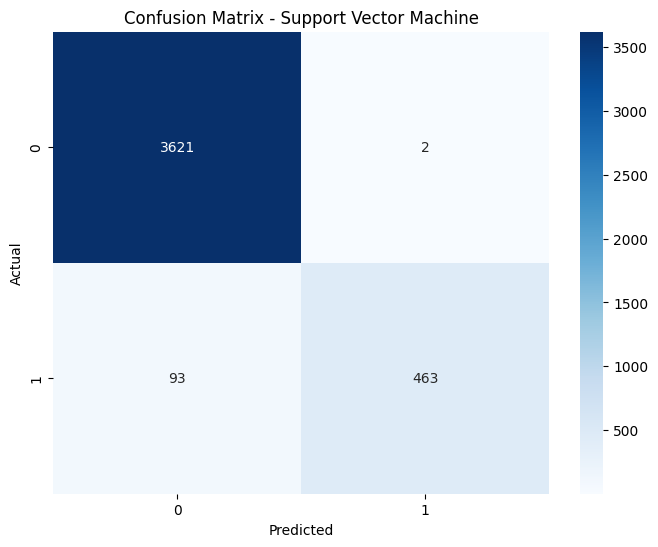

In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

classifier =  SVC()
classifier.fit(x_train_tfidf, y_train)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score = cross_val_score(classifier, x_train_tfidf,y_train,scoring="accuracy", cv=10)
print("SVC Mean Accuracy : %f " % cv_score.mean())

y_pred = cross_val_predict(classifier, x_train_tfidf, y_train, cv=10)
conf_matrix = metrics.confusion_matrix(y_train, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()


Naive Bayes Mean Accuracy: 0.958602


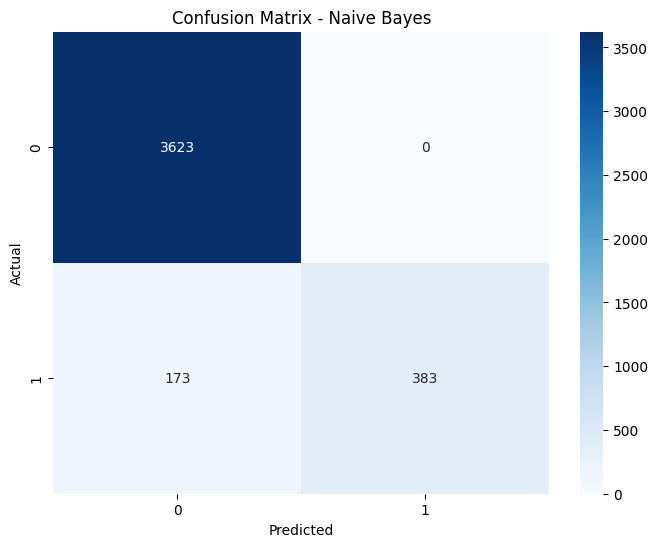

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn import metrics

classifier_nb = MultinomialNB()
classifier_nb.fit(x_train_tfidf, y_train)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_score_nb = cross_val_score(classifier_nb, x_train_tfidf, y_train, scoring="accuracy", cv=cv)

print("Naive Bayes Mean Accuracy: %f" % cv_score_nb.mean())

y_pred_nb = cross_val_predict(classifier_nb, x_train_tfidf, y_train, cv=cv)
conf_matrix_nb = metrics.confusion_matrix(y_train, y_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, cmap="Blues", fmt="d", xticklabels=classifier_nb.classes_, yticklabels=classifier_nb.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()
